In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
data=[df.iloc[0],df.iloc[1],df.iloc[2],df.iloc[3]]

In [ ]:
print(data)

In [10]:
import matplotlib.pyplot as plt

fig=plt.Figure()
#plt.boxplot(data)
plt.hist(data)

([array([    7.,    45.,   204.,   654.,  1028.,   982.,   533.,   169.,
            23.,     5.]),
  array([  0.00000000e+00,   0.00000000e+00,   8.00000000e+00,
           2.40000000e+02,   1.67600000e+03,   1.55200000e+03,
           1.73000000e+02,   1.00000000e+00,   0.00000000e+00,
           0.00000000e+00]),
  array([  0.00000000e+00,   1.00000000e+00,   7.10000000e+01,
           4.97000000e+02,   1.35200000e+03,   1.27500000e+03,
           4.26000000e+02,   2.80000000e+01,   0.00000000e+00,
           0.00000000e+00]),
  array([    0.,     0.,     0.,    52.,  1796.,  1754.,    48.,     0.,
             0.,     0.])],
 array([-717071.17546622, -563613.49710375, -410155.81874127,
        -256698.14037879, -103240.46201631,   50217.21634616,
         203674.89470864,  357132.57307112,  510590.25143359,
         664047.92979607,  817505.60815855]),
 <a list of 4 Lists of Patches objects>)

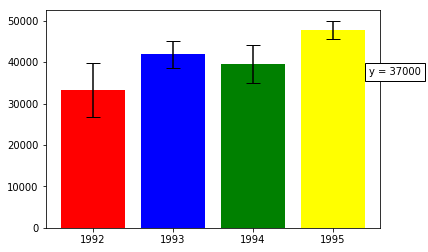

In [30]:
plt.show()

In [12]:
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

In [29]:
df_mean = df.mean(axis=1) # Averaging column entries.

# df.shape[1] gives the number of columns = 3650.
# df.std only does numerator calculation of standard deviation formula.
df_std = df.std(axis=1)/np.sqrt(df.shape[1])

# Choice of y value:
y = 37000

# In probability and statistics, 1.96 is the approximate value of the 97.5 percentile point of the normal distribution.
# 95% of the area under a normal curve lies within roughly 1.96 standard deviations of the mean, and due to the central limit theorem, this number is therefore used in the construction of approximate 95% confidence intervals.
norm = Normalize(vmin=-1.96, vmax=1.96)

# 'seismic', 'coolwarm', etc. are examples of available colour palettes.
cmap = get_cmap('coolwarm')

df_colors = pd.DataFrame([])
df_colors['intensity'] = norm((df_mean-y)/df_std) # Usual normalising formula.
df_colors['color'] = ['red','blue','green','yellow'] # Assign colour depending on norm value.

# Remember we normalised df_std for assigning colour intensity earlier. Therefore the actual error will be scaled by 1.96.
# capsize sets thw whiskers for the error on the barplot.
bar_plot = plt.bar(df.index, df_mean, yerr=df_std*1.96, color=df_colors['color'], capsize=7);

# axhline = Horizontal line.
#hoz_line = plt.axhline(y=y, color='k', linewidth=2, linestyle='--');

# Text box for chosen value. 1995.5 gives the x axis location for positioning the box.
# ec is the colour of the box border. fc is the colour of the box filling.
y_text = plt.text(1995.45, y, 'y = %d' %y, bbox=dict(fc='white',ec='k'));

# Add xticks
plt.xticks(df.index, ('1992', '1993', '1994', '1995'));